### CLASSIFIER COMPARISON

In [1]:
import pandas as pd

from utils import flabel
from plots import stats_plot, f1_score_plot, distr_plot, conf_mat_plot

In [2]:
models = {
    'mod_bert': 'mbert',                    # Multilingual BERT Base (110M)
    'mod_estbert': 'EstBERT',               # EstBERT (110M)
    'mod_erinem_base': 'ernie-m-base',      # Ernie-M Base (120M)
    'mod_xlmr_base': 'xlm-roberta-base',    # XLM-R Base (125M)
    'mod_xlmr_large': 'xlm-roberta-large',  # XLM-R Large (355M)
    'mod_erniem_large': 'ernie-m-large'     # Ernie-M Large (370M)
}

titles = [
    'M-BERT', 
    'EstBERT', 
    'ERNIE-M-Base', 
    'XLM-R-Base', 
    'XLM-R-Large', 
    'ERNIE-M-Large'
]

epochstats = {}
valpreds = {}
for model_var, model_name in models.items():
    epochstats[model_var] = pd.read_parquet(f'data/{model_name}-epoch-stats.parquet')
    valpreds[model_var] = flabel(f'data/{model_name}-val-predictions.parquet')

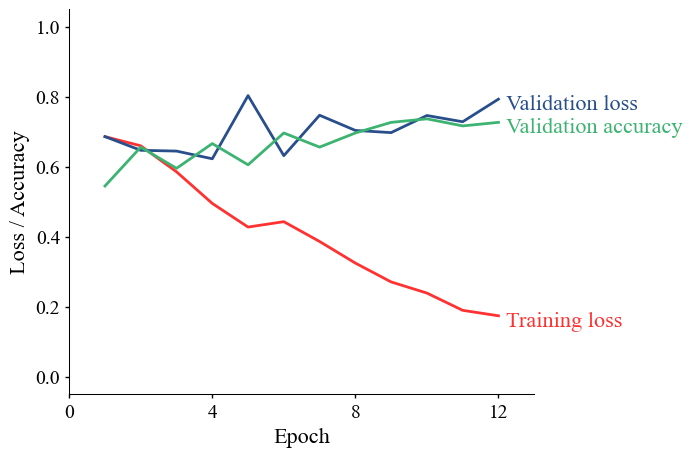

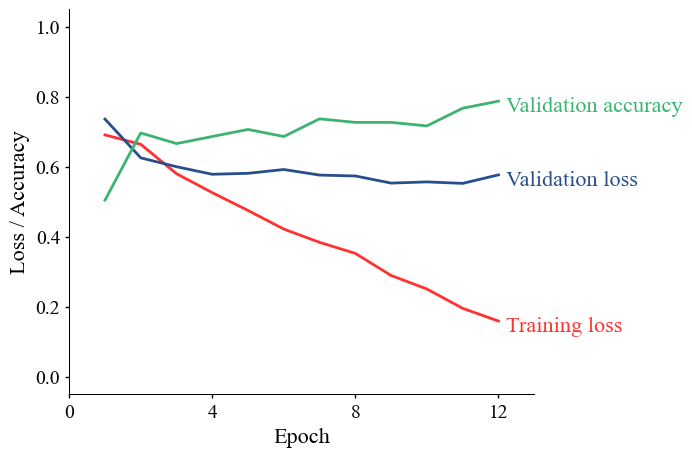

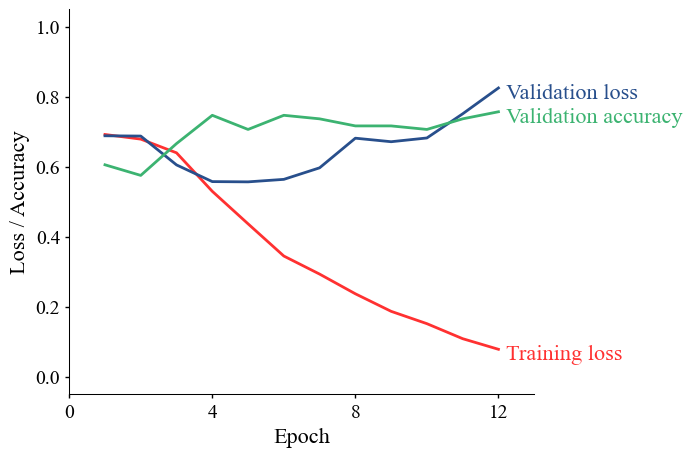

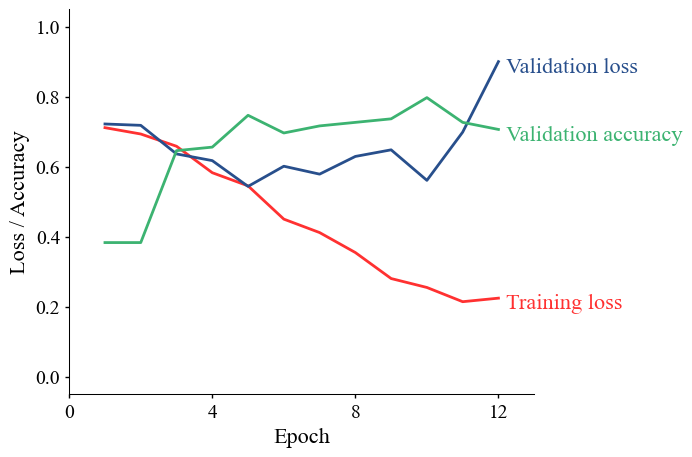

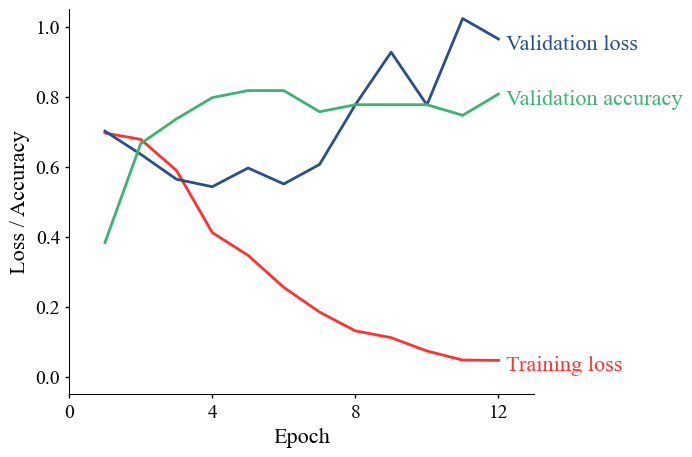

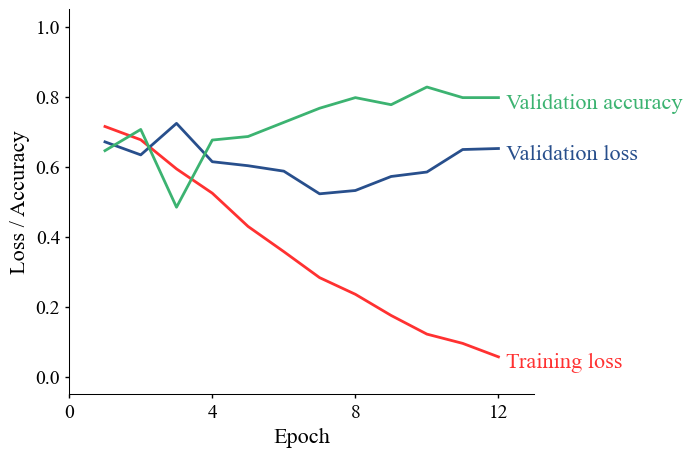

In [3]:
for model_var, model_name in models.items():
    output_name = f"cls1-stats-{model_name}"
    stats_plot(epochstats[model_var], title="", output=output_name)

In [4]:
# conf_mat_plot(list(valpreds.values()), titles)

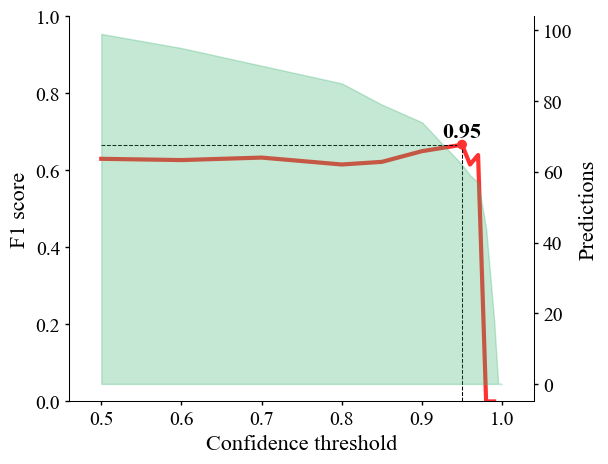

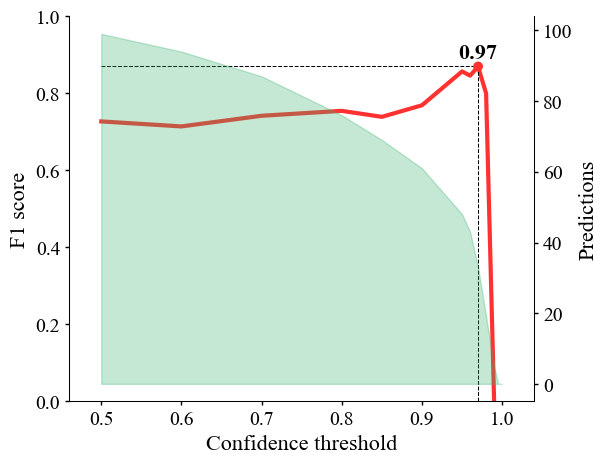

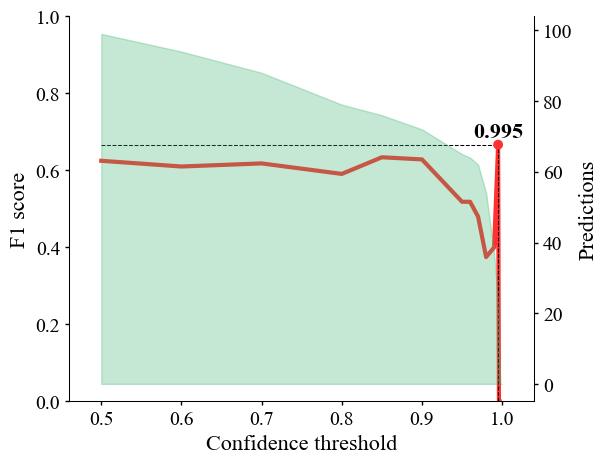

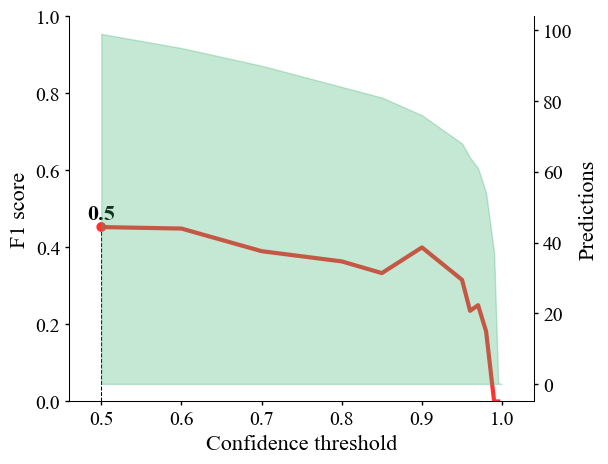

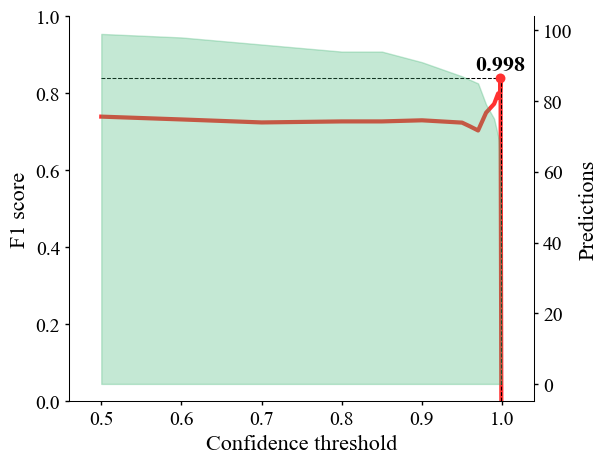

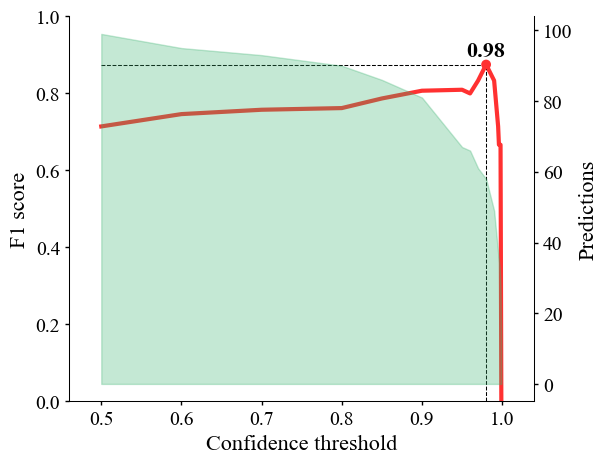

In [5]:
for model_var, model_name in models.items():
    data = valpreds[model_var]
    output_name = f"cls1-preds-{model_name}"
    f1_score_plot(data, title="", output=output_name)

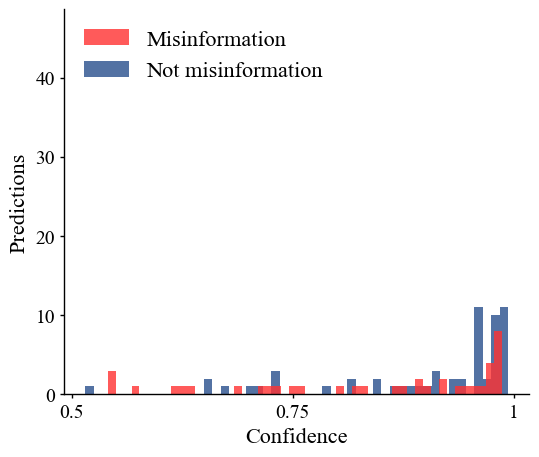

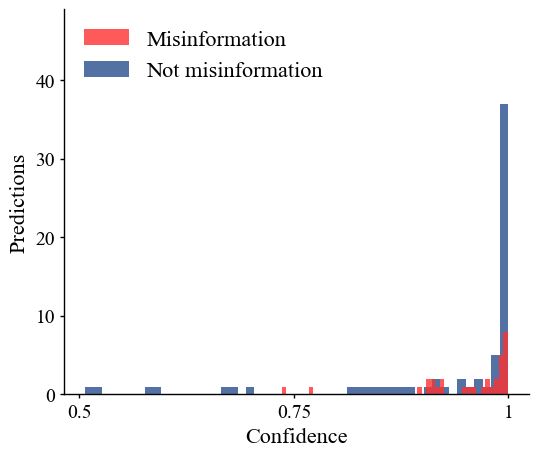

In [6]:
sel_models = {
    'mod_estbert': valpreds['mod_estbert'],
    'mod_erniem_large': valpreds['mod_erniem_large']
}

sel_titles = [
    'EstBERT', 
    'ERNIE-M-Large'
]

sel_y_adj = [2.7, 1] 

for model_data, model_title, y_adj in zip(sel_models.values(), sel_titles, sel_y_adj):
    output_name = f"cls1-preds-comp-{model_title}"
    distr_plot(model_data, "", y_adj=y_adj, output=output_name)

In [7]:
# from sklearn.metrics import classification_report

# dataframes = list(valpreds.values())

# thresholds = [0.95, 0.97, 0.995, 0.5, 0.998, 0.98]

# for title, df, threshold in zip(titles, dataframes, thresholds):
#     filtered_df = df[df['Confidence'] >= threshold]
#     y_true = filtered_df['True Label']
#     y_pred = filtered_df['Prediction']
#     report = classification_report(y_true, y_pred, zero_division=0)
#     print(f"Classification Report for {title} (Threshold: {threshold}):\n{report}\n")